<a href="https://colab.research.google.com/github/primpunn/senior-project/blob/main/model_input_Final_paper_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pickle
import os
import math
from google.colab import files
from sklearn.metrics import r2_score
from sklearn.metrics import max_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import sklearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder = '/content/drive/MyDrive/SmartShoe/Input/Data_input'
datas_name = os.listdir(folder)
print(datas_name)

['Aof_model_1.xlsx', 'Aof_model_2.xlsx', 'Aof_model_3.xlsx', 'Aof_model_4.xlsx', 'Aof_model_5.xlsx', 'Aof_model_6.xlsx', 'Aof_model_9.xlsx', 'Aof_model_7.xlsx', 'Aof_model_8.xlsx', 'Aof_model_10.xlsx', 'Aof_model_11.xlsx', 'Aof_model_12.xlsx', 'Aof_model_13.xlsx', 'Aof_model_14.xlsx', 'Aof_model_15.xlsx', 'Aof_model_16.xlsx', 'Aof_model_17.xlsx', 'Aof_model_18.xlsx', 'Aof_model_19.xlsx', 'Aof_model_20.xlsx', 'Aof_model_21.xlsx']


In [ ]:
X_train = np.array([])
X_test = np.array([])
Y_train = np.array([])
Y_test = np.array([])
for i, data_name in enumerate(datas_name): 
  data = pd.read_excel(os.path.join(folder, data_name))
  if i<17:
    try:
      X_train = np.vstack((X_train, np.array(data.iloc[:,1:])))
      Y_train = np.append(Y_train, np.array(data.iloc[:,0]))
    except:
      # print(i)
      X_train = np.array(data.iloc[:,1:])
      Y_train = np.array(data.iloc[:,0])

  else:
    try:
      X_test = np.vstack((X_test, np.array(data.iloc[:,1:])))
      Y_test = np.append(Y_test, np.array(data.iloc[:,0]))
    except:
      X_test = np.array(data.iloc[:,1:])
      Y_test = np.array(data.iloc[:,0])

ImportError: ignored

In [ ]:
#first train
model_MLP = MLPRegressor(hidden_layer_sizes=[1051,801,751,], activation='relu', random_state=1, max_iter=10000, alpha=0.0001, batch_size='auto').fit(X_train, Y_train)
results_MLP =[]
for i in range(len(Y_test)): 
    results_MLP.append(model_MLP.predict([X_test[i]])[0])
score_test_1 = model_MLP.score(X_test,Y_test)
score_test_1_1 = model_MLP.score(X_test[:75],Y_test[:75])
print(score_test_1_1,score_test_1,math.sqrt(mean_squared_error(Y_test[:75],results_MLP[:75])),math.sqrt(mean_squared_error(Y_test,results_MLP)))

0.9612610426732282 0.801030029776792 34.395231116586466 79.02967894131584


In [ ]:
mean_error_peak=[]
for i in range(len(Y_test)):
  if i%75 == 0: 
    find_peak_Y_test = max(Y_test[i:i+75])
    find_peak_results_MLP = max(results_MLP[i:i+75])
    error = np.abs((find_peak_Y_test-find_peak_results_MLP)/find_peak_Y_test)*100
    mean_error_peak.append(error)

mean_error_peak = np.mean(mean_error_peak)

print('mean = ',mean_error_peak ,'%')

mean =  13.051216846009487 %


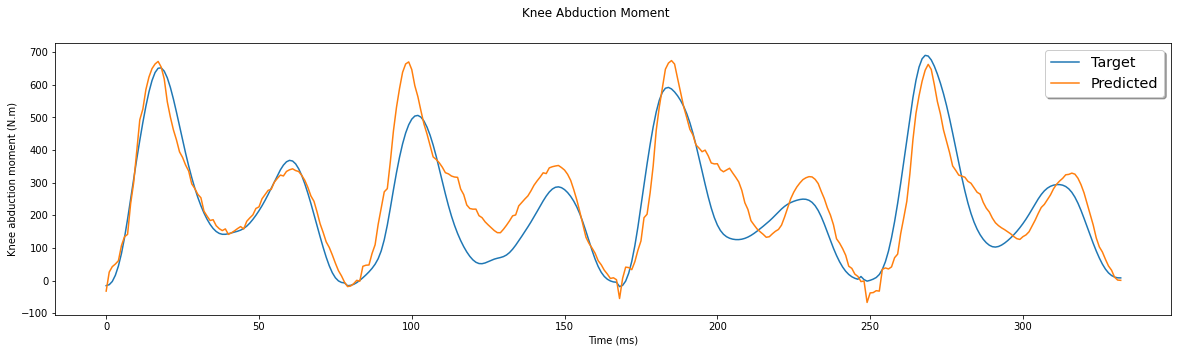

In [ ]:
fig, axs = plt.subplots(figsize=(20,5))
fig.suptitle('Knee Abduction Moment')
axs.plot(range(len(Y_test)), Y_test,label='Target')
axs.plot(range(len(Y_test)), results_MLP,label='Predicted')
plt.xlabel('Time (ms)')
plt.ylabel('Knee abduction moment (N.m)')
legend = axs.legend(loc='upper right', shadow=True, fontsize='x-large')
# plt.savefig('MLP_1051_801_751_test.png')
# files.download('MLP_1051_801_751_test.png')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

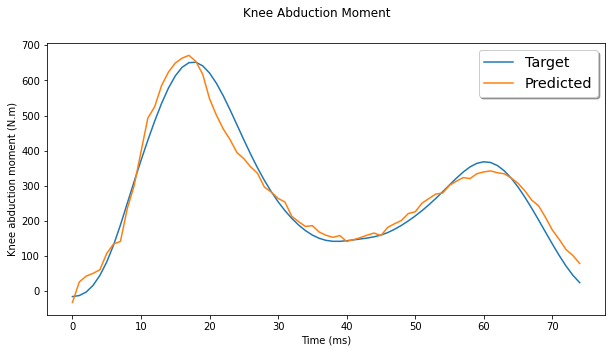

In [ ]:
fig, axs = plt.subplots(figsize=(10,5))
fig.suptitle('Knee Abduction Moment')
axs.plot(range(len(Y_test[:75])), Y_test[:75],label='Target')
axs.plot(range(len(Y_test[:75])), results_MLP[:75],label='Predicted')
plt.xlabel('Time (ms)')
plt.ylabel('Knee abduction moment (N.m)')
legend = axs.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.savefig('MLP_1051_801_751_test_[:75].png')
files.download('MLP_1051_801_751_test_[:75].png')

